#  <b>╭</b> <u>eSports Earnings - Data Analysis</u> <b>╮</b>

## ¤ Import necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#### ⭒ Format options

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
plt.style.use('seaborn')

In [4]:
#plt.style.available

# 

## ¤ Load the Data

In [5]:
# Dataset: https://www.kaggle.com/jackdaoud/esports-earnings-for-players-teams-by-game

In [6]:
path = '../Datasets/eSports/'

In [7]:
countries = pd.read_csv(path + 'country-and-continent-codes-list.csv')
players = pd.read_csv(path + 'highest_earning_players.csv')
teams = pd.read_csv(path + 'highest_earning_teams.csv')

# 

## ¤ Data Exploratory

In [8]:
countries.head()

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.00
1,Europe,EU,"Albania, Republic of",AL,ALB,8.00
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.00
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.00
4,Oceania,OC,American Samoa,AS,ASM,16.00


In [9]:
countries.shape

(262, 6)

In [10]:
players.head()

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,3883,Peter,Rasmussen,dupreeh,dk,"1,822,989.41",Counter-Strike: Global Offensive,First-Person Shooter
1,3679,Andreas,Højsleth,Xyp9x,dk,"1,799,288.57",Counter-Strike: Global Offensive,First-Person Shooter
2,3885,Nicolai,Reedtz,dev1ce,dk,"1,787,489.88",Counter-Strike: Global Offensive,First-Person Shooter
3,3672,Lukas,Rossander,gla1ve,dk,"1,652,350.75",Counter-Strike: Global Offensive,First-Person Shooter
4,17800,Emil,Reif,Magisk,dk,"1,416,448.64",Counter-Strike: Global Offensive,First-Person Shooter


In [11]:
players.shape

(1000, 8)

In [12]:
teams.head()

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
0,760,San Francisco Shock,"3,105,000.00",7,Overwatch,First-Person Shooter
1,776,London Spitfire,"1,591,136.50",13,Overwatch,First-Person Shooter
2,768,New York Excelsior,"1,572,618.50",18,Overwatch,First-Person Shooter
3,773,Philadelphia Fusion,"1,186,278.50",15,Overwatch,First-Person Shooter
4,766,Seoul Dynasty,"1,130,000.00",6,Overwatch,First-Person Shooter


In [13]:
teams.shape

(928, 6)

# 

In [14]:
countries.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Continent_Name             262 non-null    object 
 1   Continent_Code             219 non-null    object 
 2   Country_Name               262 non-null    object 
 3   Two_Letter_Country_Code    261 non-null    object 
 4   Three_Letter_Country_Code  258 non-null    object 
 5   Country_Number             258 non-null    float64
dtypes: float64(1), object(5)
memory usage: 83.0 KB


In [15]:
countries.memory_usage(deep=True)

Index                          128
Continent_Name               16836
Continent_Code               14297
Country_Name                 20577
Two_Letter_Country_Code      15431
Three_Letter_Country_Code    15608
Country_Number                2096
dtype: int64

#

In [16]:
players.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PlayerId       1000 non-null   int64  
 1   NameFirst      1000 non-null   object 
 2   NameLast       1000 non-null   object 
 3   CurrentHandle  1000 non-null   object 
 4   CountryCode    1000 non-null   object 
 5   TotalUSDPrize  1000 non-null   float64
 6   Game           1000 non-null   object 
 7   Genre          1000 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 405.2 KB


In [17]:
players.memory_usage(deep=True)

Index              128
PlayerId          8000
NameFirst        63973
NameLast         63382
CurrentHandle    63314
CountryCode      59000
TotalUSDPrize     8000
Game             70200
Genre            78900
dtype: int64

#

In [18]:
teams.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TeamId            928 non-null    int64  
 1   TeamName          928 non-null    object 
 2   TotalUSDPrize     928 non-null    float64
 3   TotalTournaments  928 non-null    int64  
 4   Game              928 non-null    object 
 5   Genre             928 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 219.7 KB


In [19]:
teams.memory_usage(deep=True)

Index                 128
TeamId               7424
TeamName            64648
TotalUSDPrize        7424
TotalTournaments     7424
Game                65148
Genre               72764
dtype: int64

In [20]:
print('\n➥  We could change some types e.g.: game and genre as category type but here are only 400 KB.')


➥  We could change some types e.g.: game and genre as category type but here are only 400 KB.


# 

In [21]:
countries.isnull().sum()

Continent_Name                0
Continent_Code               43
Country_Name                  0
Two_Letter_Country_Code       1
Three_Letter_Country_Code     4
Country_Number                4
dtype: int64

In [22]:
print('Missing Values (in percentage, in country data)', end='\n\n')
for col in countries.columns:
    miss_val = countries[col].isnull().sum() / countries.isnull().sum().sum()
    if len(str(miss_val * 100).split('.')[0]) == 1:
        print(f'[  {round(miss_val * 100, 1)}% ]', col)
    else:
        print(f'[ {round(miss_val * 100, 1)}% ]', col)

Missing Values (in percentage, in country data)

[  0.0% ] Continent_Name
[ 82.7% ] Continent_Code
[  0.0% ] Country_Name
[  1.9% ] Two_Letter_Country_Code
[  7.7% ] Three_Letter_Country_Code
[  7.7% ] Country_Number


In [23]:
not_null_values = ~countries.isnull()
not_null_values = not_null_values.sum().sum()

total_nulls = round(countries.isnull().sum().sum() / not_null_values * 100, 2)

#format_underline = '\033[4m'
format_bold = '\033[1m'
format_end = '\033[0m'
print('\n➥  We have {1}{0}%{2} of missing values in {1}Country{2} data.'.format(total_nulls, format_bold, format_end), end='\n\n')


➥  We have 3.42% of missing values in Country data.



In [24]:
countries.duplicated().sum()

0

# 

In [25]:
players.isnull().sum()

PlayerId         0
NameFirst        0
NameLast         0
CurrentHandle    0
CountryCode      0
TotalUSDPrize    0
Game             0
Genre            0
dtype: int64

In [26]:
players.duplicated().sum()

0

# 

In [27]:
teams.isnull().sum()

TeamId              0
TeamName            0
TotalUSDPrize       0
TotalTournaments    0
Game                0
Genre               0
dtype: int64

In [28]:
teams.duplicated().sum()

0

# 

In [29]:
countries.sample(5)

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
19,Europe,EU,"Belgium, Kingdom of",BE,BEL,56.00
116,Europe,EU,"Kazakhstan, Republic of",KZ,KAZ,398.00
69,Africa,AF,"Eritrea, State of",ER,ERI,232.00
84,Asia,AS,Georgia,GE,GEO,268.00
124,Asia,AS,Lao People's Democratic Republic,LA,LAO,418.00


In [30]:
index_cols = range(len(countries.columns))
index_cols = list(index_cols)
index_cols.remove(1)

countries[countries.iloc[:, index_cols].isnull().any(axis=1)]    # to see what nan values are here, except for the continent_code column

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
152,Africa,AF,"Namibia, Republic of",NaN,NAM,516.00
258,Oceania,OC,Disputed Territory,XX,NaN,NaN
259,Asia,AS,Iraq-Saudi Arabia Neutral Zone,XE,NaN,NaN
260,Asia,AS,United Nations Neutral Zone,XD,NaN,NaN
261,Asia,AS,Spratly Islands,XS,NaN,NaN


# 

## ¤ Data Transformation

In [31]:
players.head()

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,3883,Peter,Rasmussen,dupreeh,dk,"1,822,989.41",Counter-Strike: Global Offensive,First-Person Shooter
1,3679,Andreas,Højsleth,Xyp9x,dk,"1,799,288.57",Counter-Strike: Global Offensive,First-Person Shooter
2,3885,Nicolai,Reedtz,dev1ce,dk,"1,787,489.88",Counter-Strike: Global Offensive,First-Person Shooter
3,3672,Lukas,Rossander,gla1ve,dk,"1,652,350.75",Counter-Strike: Global Offensive,First-Person Shooter
4,17800,Emil,Reif,Magisk,dk,"1,416,448.64",Counter-Strike: Global Offensive,First-Person Shooter


In [32]:
players['CountryCode'].str.upper()

0      DK
1      DK
2      DK
3      DK
4      DK
       ..
995    FI
996    US
997    IT
998    US
999    SE
Name: CountryCode, Length: 1000, dtype: object

In [33]:
players['CountryCode'] = players['CountryCode'].str.upper()

# 

In [34]:
countries.head()

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.00
1,Europe,EU,"Albania, Republic of",AL,ALB,8.00
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.00
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.00
4,Oceania,OC,American Samoa,AS,ASM,16.00


In [35]:
filtered = countries['Two_Letter_Country_Code'].notnull()     # if we don't use that filter, we will get an error about NaN values when we play the lambda function
countries[filtered]['Two_Letter_Country_Code'].apply(lambda x: x.upper())

0      AF
1      AL
2      AQ
3      DZ
4      AS
       ..
257    ZM
258    XX
259    XE
260    XD
261    XS
Name: Two_Letter_Country_Code, Length: 261, dtype: object

In [36]:
countries['Two_Letter_Country_Code'] = countries[filtered]['Two_Letter_Country_Code'].apply(lambda x: x.upper())

# 

In [37]:
merge_data = pd.merge(countries, players, left_on='Two_Letter_Country_Code', right_on='CountryCode')

In [38]:
merge_data = merge_data.loc[:, ['PlayerId', 'NameFirst', 'NameLast', 'CurrentHandle', 'TotalUSDPrize', 'Game', 'Genre','Continent_Name', 'Country_Name', 'Country_Number']]

In [39]:
merge_data.head()

,PlayerId,NameFirst,NameLast,CurrentHandle,TotalUSDPrize,Game,Genre,Continent_Name,Country_Name,Country_Number
0,61896,Thiago,Lapp,kinG,"1,021,000.00",Fortnite,Battle Royale,South America,"Argentina, Argentine Republic",32.00
1,30167,Francisco,Leimontas,PNC,"82,409.24",Hearthstone,Collectible Card Game,South America,"Argentina, Argentine Republic",32.00
2,15703,Facu,Pruzzo,Nalguidan,"70,750.00",Hearthstone,Collectible Card Game,South America,"Argentina, Argentine Republic",32.00
3,30451,Anathan,Pham,ana,"6,000,411.96",Dota 2,Multiplayer Online Battle Arena,Oceania,"Australia, Commonwealth of",36.00
4,15530,Damien,Chok,kpii,"1,809,225.30",Dota 2,Multiplayer Online Battle Arena,Oceania,"Australia, Commonwealth of",36.00


# 

## ¤ Data Visualization

### ⭒ Top Genre of Games by Earnings

In [40]:
top_games = players.groupby('Game')['TotalUSDPrize'].sum().sort_values(ascending=False)

In [41]:
top_games

Game
Dota 2                             179,178,818.95
Counter-Strike: Global Offensive    56,541,920.90
Fortnite                            43,409,370.91
League of Legends                   35,043,475.87
Starcraft II                        25,379,823.93
Hearthstone                         13,335,640.79
PUBG                                12,441,958.89
Overwatch                           12,347,808.50
Heroes of the Storm                 11,780,445.24
Arena of Valor                       8,333,952.43
Name: TotalUSDPrize, dtype: float64

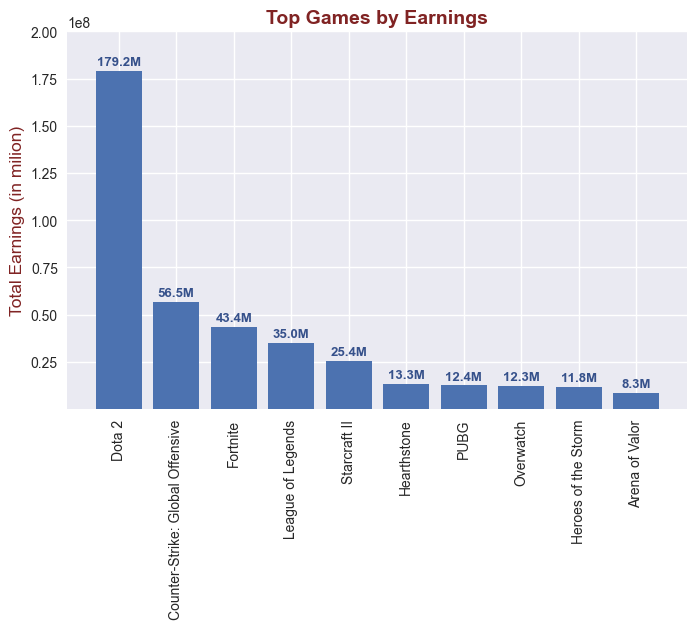

In [42]:
fig, ax = plt.subplots(figsize=(8,5), dpi=100)

plt.bar(top_games.index, top_games)


y_position = 3 * (10 ** 6)
for idx, val in enumerate(top_games):
    ax.text(idx, val + y_position, str(round(val / 10 ** 6, 1)) + 'M', ha='center', color='#36518B', fontweight='bold', fontsize=9.5)


plt.title('Top Games by Earnings', fontsize=14, color='#802323', fontweight='bold')
plt.ylabel('Total Earnings (in milion)', fontsize=12.5, color='#802323')

x = 10 ** 8    # 100,000,000
plt.yticks([0.25*x, 0.5*x, 0.75*x, 1*x, 1.25*x, 1.5*x, 1.75*x, 2*x])
plt.xticks(rotation=90)

#plt.grid(axis='y')
plt.show()
#fig.savefig('Top Games by Eranings.png')

# 

### ⭒ Top 10 Players (by Earnings)

In [43]:
players.head()

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,3883,Peter,Rasmussen,dupreeh,DK,"1,822,989.41",Counter-Strike: Global Offensive,First-Person Shooter
1,3679,Andreas,Højsleth,Xyp9x,DK,"1,799,288.57",Counter-Strike: Global Offensive,First-Person Shooter
2,3885,Nicolai,Reedtz,dev1ce,DK,"1,787,489.88",Counter-Strike: Global Offensive,First-Person Shooter
3,3672,Lukas,Rossander,gla1ve,DK,"1,652,350.75",Counter-Strike: Global Offensive,First-Person Shooter
4,17800,Emil,Reif,Magisk,DK,"1,416,448.64",Counter-Strike: Global Offensive,First-Person Shooter


In [44]:
top_10_players = players.sort_values('TotalUSDPrize', ascending=False).head(10)

In [45]:
top_10_players = top_10_players.sort_values('TotalUSDPrize')

In [46]:
top_10_players

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
109,12133,Lasse,Urpalainen,Matumbaman,FI,"3,765,369.04",Dota 2,Multiplayer Online Battle Arena
108,25335,Maroun,Merhej,GH,LB,"4,193,412.69",Dota 2,Multiplayer Online Battle Arena
107,12579,Ivan,Ivanov,MinD_ContRoL,BG,"4,579,118.16",Dota 2,Multiplayer Online Battle Arena
106,14671,Amer,Al-Barkawi,Miracle-,JO,"4,798,043.68",Dota 2,Multiplayer Online Battle Arena
105,3145,Kuro,Takhasomi,KuroKy,DE,"5,193,382.81",Dota 2,Multiplayer Online Battle Arena
104,18897,Topias,Taavitsainen,Topson,FI,"5,470,902.57",Dota 2,Multiplayer Online Battle Arena
103,2811,Sébastien,Debs,Ceb,FR,"5,554,297.41",Dota 2,Multiplayer Online Battle Arena
102,30451,Anathan,Pham,ana,AU,"6,000,411.96",Dota 2,Multiplayer Online Battle Arena
101,3822,Jesse,Vainikka,JerAx,FI,"6,470,000.02",Dota 2,Multiplayer Online Battle Arena
100,3304,Johan,Sundstein,N0tail,DK,"6,952,596.58",Dota 2,Multiplayer Online Battle Arena


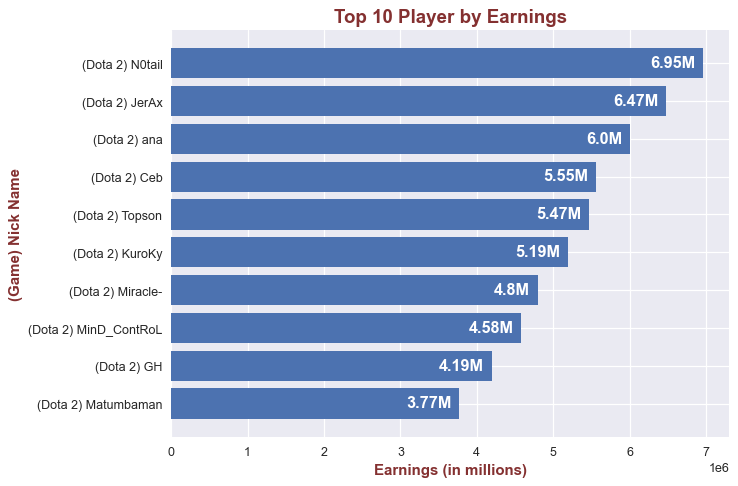

In [47]:
fig, ax = plt.subplots(figsize=(8,6), dpi=90)

plt.barh( '(' + top_10_players['Game'] + ') ' + top_10_players['CurrentHandle'], top_10_players['TotalUSDPrize'])


for idx, val in enumerate(top_10_players['TotalUSDPrize']):
    ax.text(val - 10 ** 5, idx - 0.1, str(round(val / 10 ** 6, 2)) + 'M', ha='right', fontsize=13, color='white',fontweight='bold')


plt.title('Top 10 Player by Earnings', color='#843030', fontsize=15, fontweight='bold')
plt.ylabel('(Game) Nick Name', color='#843030', fontsize=12, fontweight='bold')
plt.xlabel('Earnings (in millions)',  color='#843030', fontsize=12, fontweight='bold')

plt.show()

# 

In [48]:
merge_data.head()

,PlayerId,NameFirst,NameLast,CurrentHandle,TotalUSDPrize,Game,Genre,Continent_Name,Country_Name,Country_Number
0,61896,Thiago,Lapp,kinG,"1,021,000.00",Fortnite,Battle Royale,South America,"Argentina, Argentine Republic",32.00
1,30167,Francisco,Leimontas,PNC,"82,409.24",Hearthstone,Collectible Card Game,South America,"Argentina, Argentine Republic",32.00
2,15703,Facu,Pruzzo,Nalguidan,"70,750.00",Hearthstone,Collectible Card Game,South America,"Argentina, Argentine Republic",32.00
3,30451,Anathan,Pham,ana,"6,000,411.96",Dota 2,Multiplayer Online Battle Arena,Oceania,"Australia, Commonwealth of",36.00
4,15530,Damien,Chok,kpii,"1,809,225.30",Dota 2,Multiplayer Online Battle Arena,Oceania,"Australia, Commonwealth of",36.00


In [49]:
earnings_by_country = merge_data.groupby('Continent_Name')['TotalUSDPrize'].sum()

In [50]:
earnings_by_country

Continent_Name
Asia            182,713,541.04
Europe          156,351,953.42
North America    57,037,267.41
Oceania           7,999,674.76
South America     6,951,711.24
Name: TotalUSDPrize, dtype: float64

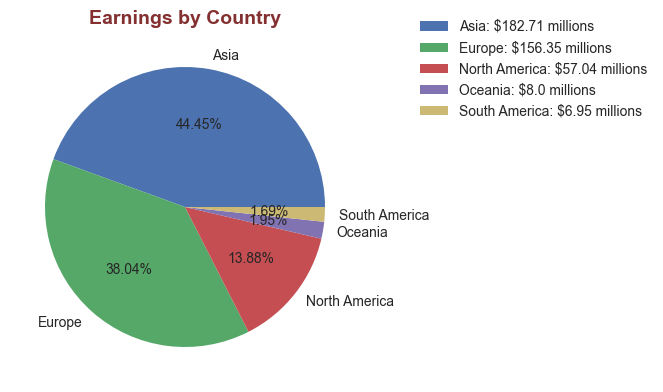

In [51]:
fig, ax = plt.subplots(figsize=(5,4), dpi=100)
fig.subplots_adjust(0.3, 0, 1, 1)

plt.pie(earnings_by_country, labels=earnings_by_country.index, autopct='%.2f%%')

plt.title('Earnings by Country', color='#843030', fontsize=14, fontweight='bold')


plt.legend(loc='upper right',
           labels=['{}: ${} millions'.format(name, round(val / 10 ** 6, 2)) for name, val in zip(earnings_by_country.index, earnings_by_country)],
           bbox_to_anchor=(1.6,1),
           bbox_transform=fig.transFigure)

plt.show()

# 

### ⭒ What is the proportion of earnings per genre in terms of both teams and players?

In [52]:
merge_data.head()

,PlayerId,NameFirst,NameLast,CurrentHandle,TotalUSDPrize,Game,Genre,Continent_Name,Country_Name,Country_Number
0,61896,Thiago,Lapp,kinG,"1,021,000.00",Fortnite,Battle Royale,South America,"Argentina, Argentine Republic",32.00
1,30167,Francisco,Leimontas,PNC,"82,409.24",Hearthstone,Collectible Card Game,South America,"Argentina, Argentine Republic",32.00
2,15703,Facu,Pruzzo,Nalguidan,"70,750.00",Hearthstone,Collectible Card Game,South America,"Argentina, Argentine Republic",32.00
3,30451,Anathan,Pham,ana,"6,000,411.96",Dota 2,Multiplayer Online Battle Arena,Oceania,"Australia, Commonwealth of",36.00
4,15530,Damien,Chok,kpii,"1,809,225.30",Dota 2,Multiplayer Online Battle Arena,Oceania,"Australia, Commonwealth of",36.00


In [53]:
teams.head()

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
0,760,San Francisco Shock,"3,105,000.00",7,Overwatch,First-Person Shooter
1,776,London Spitfire,"1,591,136.50",13,Overwatch,First-Person Shooter
2,768,New York Excelsior,"1,572,618.50",18,Overwatch,First-Person Shooter
3,773,Philadelphia Fusion,"1,186,278.50",15,Overwatch,First-Person Shooter
4,766,Seoul Dynasty,"1,130,000.00",6,Overwatch,First-Person Shooter


In [54]:
teams_groupedby_genre = teams.groupby('Genre')['TotalUSDPrize'].sum()

In [55]:
teams_groupedby_genre

Genre
Battle Royale                      51,376,333.09
Collectible Card Game              10,864,526.98
First-Person Shooter              105,319,201.82
Multiplayer Online Battle Arena   305,627,996.77
Strategy                           27,856,145.24
Name: TotalUSDPrize, dtype: float64

In [56]:
players_groupedby_genre = players.groupby('Genre')['TotalUSDPrize'].sum()

In [57]:
players_groupedby_genre

Genre
Battle Royale                      55,851,329.80
Collectible Card Game              13,335,640.79
First-Person Shooter               68,889,729.40
Multiplayer Online Battle Arena   234,336,692.49
Strategy                           25,379,823.93
Name: TotalUSDPrize, dtype: float64

In [58]:
total_earnings_by_genre = (teams_groupedby_genre + players_groupedby_genre) / 2

In [59]:
total_earnings_by_genre

Genre
Battle Royale                      53,613,831.45
Collectible Card Game              12,100,083.88
First-Person Shooter               87,104,465.61
Multiplayer Online Battle Arena   269,982,344.63
Strategy                           26,617,984.59
Name: TotalUSDPrize, dtype: float64

In [75]:
for idx, value in enumerate(total_earnings_by_genre):
    percent = str(round(value / total_earnings_by_genre.sum() * 100, 2)) + '%'
    
    if len(percent.split('.')[0]) == 2:
        print('[{1}] {0}'.format(total_earnings_by_genre.index[idx], percent))
    else:
        print('[ {1}] {0}'.format(total_earnings_by_genre.index[idx], percent))

[11.93%] Battle Royale
[ 2.69%] Collectible Card Game
[19.38%] First-Person Shooter
[60.07%] Multiplayer Online Battle Arena
[ 5.92%] Strategy


# 

### ⭒ Which game is most popular in terms of number of tournaments?

In [61]:
teams.head()

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
0,760,San Francisco Shock,"3,105,000.00",7,Overwatch,First-Person Shooter
1,776,London Spitfire,"1,591,136.50",13,Overwatch,First-Person Shooter
2,768,New York Excelsior,"1,572,618.50",18,Overwatch,First-Person Shooter
3,773,Philadelphia Fusion,"1,186,278.50",15,Overwatch,First-Person Shooter
4,766,Seoul Dynasty,"1,130,000.00",6,Overwatch,First-Person Shooter


In [62]:
most_popular_game = teams.groupby('Game')['TotalTournaments'].sum().sort_values(ascending=False)

In [63]:
most_popular_game.head(1)

Game
Starcraft II    12676
Name: TotalTournaments, dtype: int64

# 

### ⭒ Best 3 Teams by Game

In [64]:
teams.head()

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
0,760,San Francisco Shock,"3,105,000.00",7,Overwatch,First-Person Shooter
1,776,London Spitfire,"1,591,136.50",13,Overwatch,First-Person Shooter
2,768,New York Excelsior,"1,572,618.50",18,Overwatch,First-Person Shooter
3,773,Philadelphia Fusion,"1,186,278.50",15,Overwatch,First-Person Shooter
4,766,Seoul Dynasty,"1,130,000.00",6,Overwatch,First-Person Shooter


In [65]:
bestTeamsByGame = teams.loc[:, ['Game','TeamName','TotalUSDPrize']].sort_values(['Game','TotalUSDPrize'], ascending=[True,False]).groupby('Game').head(3)

In [66]:
bestTeamsByGame

,Game,TeamName,TotalUSDPrize
880,Arena of Valor,eStar Gaming,"2,613,323.67"
881,Arena of Valor,Hero JiuJ,"1,104,361.96"
882,Arena of Valor,Qiao Gu Reapers,"951,865.26"
400,Counter-Strike: Global Offensive,Astralis,"8,503,918.81"
401,Counter-Strike: Global Offensive,Team Liquid,"4,675,925.35"
402,Counter-Strike: Global Offensive,Fnatic,"4,653,396.20"
500,Dota 2,OG,"33,810,636.13"
501,Dota 2,Team Liquid,"22,967,431.10"
502,Dota 2,Evil Geniuses,"19,988,670.62"
300,Fortnite,Lazarus,"3,708,150.00"


In [67]:
bestTeamsByGame = bestTeamsByGame.sort_values(['Game','TotalUSDPrize'], ascending=[True, False])

In [68]:
bestTeamsByGame

,Game,TeamName,TotalUSDPrize
880,Arena of Valor,eStar Gaming,"2,613,323.67"
881,Arena of Valor,Hero JiuJ,"1,104,361.96"
882,Arena of Valor,Qiao Gu Reapers,"951,865.26"
400,Counter-Strike: Global Offensive,Astralis,"8,503,918.81"
401,Counter-Strike: Global Offensive,Team Liquid,"4,675,925.35"
402,Counter-Strike: Global Offensive,Fnatic,"4,653,396.20"
500,Dota 2,OG,"33,810,636.13"
501,Dota 2,Team Liquid,"22,967,431.10"
502,Dota 2,Evil Geniuses,"19,988,670.62"
300,Fortnite,Lazarus,"3,708,150.00"


# 

In [69]:
merge_data

,PlayerId,NameFirst,NameLast,CurrentHandle,TotalUSDPrize,Game,Genre,Continent_Name,Country_Name,Country_Number
0,61896,Thiago,Lapp,kinG,"1,021,000.00",Fortnite,Battle Royale,South America,"Argentina, Argentine Republic",32.00
1,30167,Francisco,Leimontas,PNC,"82,409.24",Hearthstone,Collectible Card Game,South America,"Argentina, Argentine Republic",32.00
2,15703,Facu,Pruzzo,Nalguidan,"70,750.00",Hearthstone,Collectible Card Game,South America,"Argentina, Argentine Republic",32.00
3,30451,Anathan,Pham,ana,"6,000,411.96",Dota 2,Multiplayer Online Battle Arena,Oceania,"Australia, Commonwealth of",36.00
4,15530,Damien,Chok,kpii,"1,809,225.30",Dota 2,Multiplayer Online Battle Arena,Oceania,"Australia, Commonwealth of",36.00
...,...,...,...,...,...,...,...,...,...,...
1027,12793,Jeffrey,Liu,Tarei,"62,454.40",Hearthstone,Collectible Card Game,North America,United States of America,840.00
1028,29438,Anthony,Trevino,Ant,"52,375.00",Hearthstone,Collectible Card Game,North America,United States of America,840.00
1029,3255,Drew,Biessener,Tidesoftime,"50,449.60",Hearthstone,Collectible Card Game,North America,United States of America,840.00
1030,43043,Mike,Eichner,Ike,"48,550.00",Hearthstone,Collectible Card Game,North America,United States of America,840.00


In [70]:
filtered = merge_data.loc[:, ['CurrentHandle', 'Continent_Name','TotalUSDPrize']]
hightest_player_by_continent = filtered.sort_values(['Continent_Name', 'TotalUSDPrize'], ascending=[True, False]).groupby('Continent_Name').head(5)

In [71]:
hightest_player_by_continent = hightest_player_by_continent.sort_values(['Continent_Name', 'TotalUSDPrize'], ascending=[False, True]).set_index('Continent_Name')

In [72]:
hightest_player_by_continent

,CurrentHandle,TotalUSDPrize
Continent_Name,,
South America,kinG,"1,021,000.00"
South America,coldzera,"1,021,901.46"
South America,FalleN,"1,059,938.92"
South America,fer,"1,063,038.92"
South America,TACO,"1,063,858.27"
Oceania,Custa,"53,759.68"
Oceania,Arcaner,"57,228.00"
Oceania,Luke12,"79,049.82"
Oceania,kpii,"1,809,225.30"
